# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [7]:
from unityagents import UnityEnvironment
from multi_ddpg_agent import ReplayBuffer
#from maddpg import MADDPG
import torch
import numpy as np
from tensorboardX import SummaryWriter
import os
#from utilities import transpose_list, transpose_to_tensor
import time
from multi_ddpg_agent import MADDPG 
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

# keep training awake
#from workspace_utils import keep_awake

# for saving gif
import imageio

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis_Linux/Tennis.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 2):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0


When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

24
action_size:  2
r seed is:  0
Episode 1	Avg score: 0.00
Episode 101	Avg score: 0.00
Episode 201	Avg score: 0.00
Episode 301	Avg score: 0.00
Episode 401	Avg score: 0.00
Episode 501	Avg score: 0.01
Episode 601	Avg score: 0.00
Episode 701	Avg score: 0.00
Episode 801	Avg score: 0.00
Episode 901	Avg score: 0.00
Episode 1001	Avg score: 0.00
Episode 1101	Avg score: 0.00
Episode 1201	Avg score: 0.00
Episode 1301	Avg score: 0.00
Episode 1401	Avg score: 0.00
Episode 1501	Avg score: 0.00
Episode 1601	Avg score: 0.02
Episode 1701	Avg score: 0.02
Episode 1801	Avg score: 0.01
Episode 1901	Avg score: 0.01
Episode 2001	Avg score: 0.02
Episode 2101	Avg score: 0.01
Episode 2201	Avg score: 0.03
Episode 2301	Avg score: 0.03
Episode 2401	Avg score: 0.04
Episode 2501	Avg score: 0.03
Episode 2601	Avg score: 0.04
Episode 2701	Avg score: 0.05
Episode 2801	Avg score: 0.13
Episode 2901	Avg score: 0.19
Episode 3001	Avg score: 0.17
Episode 3101	Avg score: 0.19
Episode 3201	Avg score: 0.31
Episode 3301	Avg score

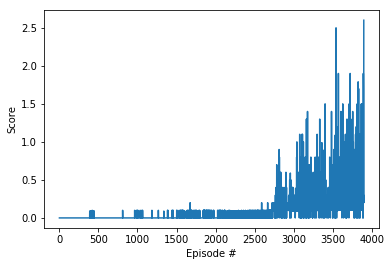

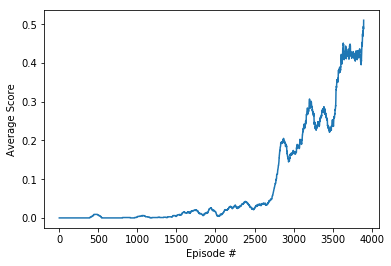

In [8]:

scores_deque = deque(maxlen=100)
scores = []
scores_avg = []
episodes = 100000

PRINT_EVERY = 100

print(state_size)
print('action_size: ', action_size)
maddpgagent = MADDPG(2,state_size, action_size, 0) 

for e in range(episodes):                                    # play game for 5 episodes
    env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    score = np.zeros((num_agents,))
    
    while True:
        actions = maddpgagent.act(states)
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        
        next_states = env_info.vector_observations
        rewards = env_info.rewards 
        re = np.asarray(rewards)

        
        dones = env_info.local_done  
        
        score += np.array(re)
       
        maddpgagent.step(states, actions, rewards, next_states, dones)
        
        states = next_states
        
        if any(dones):                                 
            break
        
 
    score_max = np.max(score)
    scores.append(score_max)
    scores_deque.append(score_max)
    score_avg = np.mean(scores_deque)
    scores_avg.append(score_avg)
    
    if score_avg >= 0.5:
        maddpgagent.save_weights()
        print("\rSolved! In episode: {} \tAvg score: {:.2f}".format(e+1, score_avg))
        break
    if e % PRINT_EVERY == 0:
        print('\rEpisode {}\tAvg score: {:.2f}'.format(e+1, score_avg))
    
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores_avg)+1), scores_avg)
plt.ylabel('Average Score')
plt.xlabel('Episode #')
plt.show()

In [15]:
def maddpgrunner(maddpgagent, episodes = 1000000, print_every=10, stable_episode_count=100, target_score = 30):
    
    
    scores_deque = deque(maxlen=stable_episode_count)
    scores = []
    scores_avg = []
    
    episodes_start = time.time()
    
    for i_episode in range(1, episodes+1):                                    # play game for 5 episodes
        env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
        states = env_info.vector_observations                  # get the current state (for each agent)
        score = np.zeros((num_agents,))

        while True:
            actions = maddpgagent.act(states)
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment

            next_states = env_info.vector_observations
            rewards = env_info.rewards 
            re = np.asarray(rewards)


            dones = env_info.local_done  

            score += np.array(re)

            maddpgagent.step(states, actions, rewards, next_states, dones)

            states = next_states

            if any(dones):                                 
                break


        score_max = np.max(score)
        scores.append(score_max)
        scores_deque.append(score_max)
        score_avg = np.mean(scores_deque)
        scores_avg.append(score_avg)

    

        if np.mean(scores_deque) <= target_score:
            if i_episode % print_every == 0:
                episodes_end = time.time()
                print('\rEpisode {}\tAverage score in the latest {} episodes: \
                      {}'.format(i_episode, i_episode if i_episode <= stable_episode_count \
                                 else stable_episode_count, np.mean(scores_deque)))
                print('\rLast {} episodes took {} seconds'.format(print_every, episodes_end - episodes_start))
                episodes_start = time.time()
        else:
            maddpgagent.save_weights()
            print('\rEpisode {}\tAverage score in the latest {} episodes: \
                    {}'.format(i_episode, i_episode if i_episode <= stable_episode_count \
                               else stable_episode_count, np.mean(scores_deque)))
            print('\r\rThe score average is over {} in the last {} episodes. \
                    Stop the training.'.format(target_score, stable_episode_count))
            break
    
        
    return scores, scores_avg

In [16]:
def plotGraphs(scorelist, cols = 2, rows = 4, size = (16, 9)):
    '''
    Display images in a grid
    '''
    
    number_of_images = len(scorelist)
    
    if (rows == 1 and cols == 1):
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.plot(np.arange(len(scorelist[0])), scorelist[0])
        plt.ylabel('Score')
        plt.xlabel('Episode #')
        plt.show()
    else:
        figure, axes = plt.subplots(rows, cols, figsize = size)
        indices = range(number_of_images)
        figure.subplots_adjust(hspace = 0.5)
        print(axes)
        axeslist = [item for item in axes]
        for ax, index in zip(axeslist, indices):
            np.delete(axeslist, 0, 0)
            if index < number_of_images:
                ax.plot(np.arange(1, len(scorelist[index])+1), scorelist[index])
                ax.set_title("Batch_size: " + str(batch_sizes[index]))
                ax.set_xlabel("Episode #")
                ax.set_ylabel("Score")

In [17]:
start = time.time()

batch_sizes = [100]

scorelist = []
avgscorelist = []
batch_times = []

for batch_size in batch_sizes:
    loopstart = time.time()
    maddpgagent = MADDPG(2, state_size=state_size, action_size=action_size, rand_seed=17, BATCH_SIZE=batch_size)
    scores, scores_avg = maddpgrunner(maddpgagent, print_every=40, stable_episode_count=100, target_score=0.02)
    scorelist.append(scores)
    avgscorelist.append(scores_avg)
    loopend = time.time()
    print("\rBatch size: ", batch_size, " took ", loopend - loopstart, " seconds.\n")
    batch_times.append(loopend - loopstart)

end = time.time()
print('Elapsed ', end - start, ' seconds.')

r seed is:  17
Episode 40	Average score in the latest 40 episodes:                       0.0
Last 40 episodes took 10.342173099517822 seconds
Episode 80	Average score in the latest 80 episodes:                       0.0
Last 40 episodes took 14.377176284790039 seconds
Episode 120	Average score in the latest 100 episodes:                       0.0
Last 40 episodes took 13.955343246459961 seconds
Episode 160	Average score in the latest 100 episodes:                       0.0
Last 40 episodes took 13.75940465927124 seconds
Episode 200	Average score in the latest 100 episodes:                       0.0
Last 40 episodes took 14.30073356628418 seconds
Episode 240	Average score in the latest 100 episodes:                       0.004000000059604645
Last 40 episodes took 16.36313819885254 seconds
Episode 280	Average score in the latest 100 episodes:                       0.005900000091642142
Last 40 episodes took 14.721856832504272 seconds
Episode 320	Average score in the latest 100 episodes:  